# Machine learning algorithm part 1 

As this was a question of classification, where we sought to classify the damage grade of each building, we first fell back on the default solution we had been taught, uni-variet decesions trees.


In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
sb.set()

In [2]:
train = pd.read_csv('train_values.csv')

test = pd.DataFrame(train[-55000:])

tr_dmgG = (train['damage_grade']) # response 

tr_age = (train['age']) #predcitors
tr_floors = (train['count_floors_pre_eq'])
tr_height = (train['height_percentage'])
tr_area = (train['area_percentage'])

tr_dmgDF = pd.DataFrame(train['damage_grade'])
tr_ageDF = pd.DataFrame(train['age'])
tr_floorsDF = pd.DataFrame(['count_floors_pre_eq'])
tr_heightDF = pd.DataFrame(train['height_percentage'])
tr_areaDF = pd.DataFrame(train['area_percentage'])

te_dmgDF = pd.DataFrame(test['damage_grade'])

tr_dmgDF



,damage_grade
0,3
1,2
2,3
3,2
4,3
...,...
260596,2
260597,3
260598,3
260599,2


## Decision trees

In [3]:
#importing tree classifier, graphviz

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz

In [4]:
#creating dectree object and training / fitting 

dectree = DecisionTreeClassifier(max_depth = 4)


### Using height as a predictor

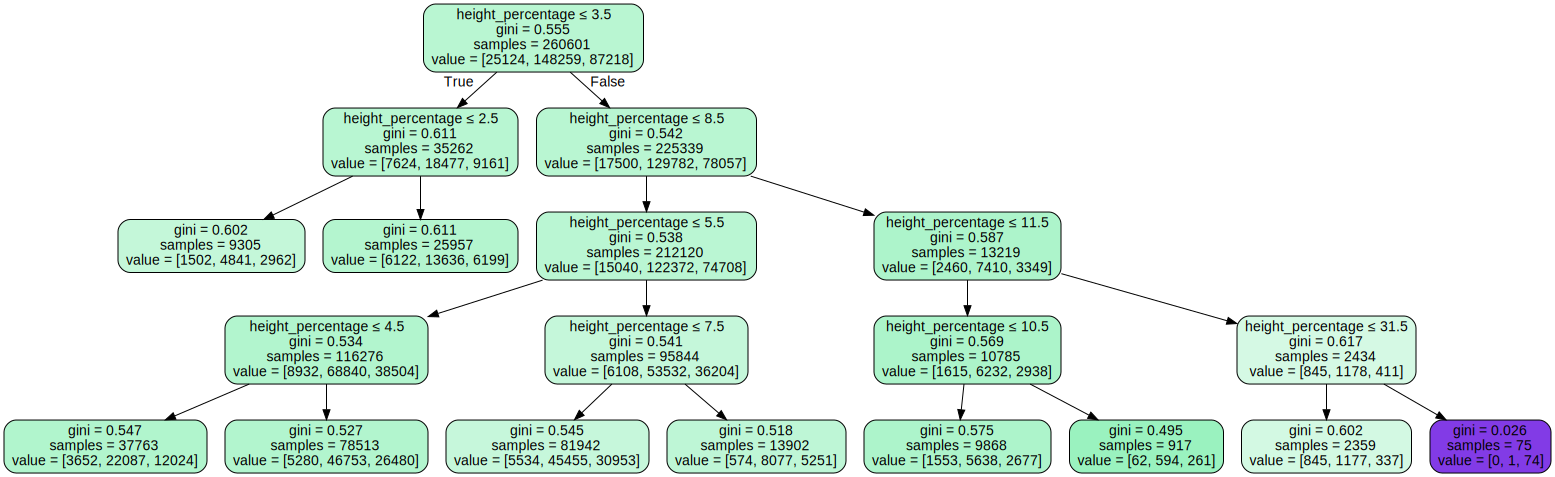

In [5]:
#importing tree classifier, graphviz

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz
#creating dectree object and training / fitting 

dectree = DecisionTreeClassifier(max_depth = 4)

dectree.fit(tr_heightDF, tr_dmgDF)

treedot = export_graphviz(dectree,
                         feature_names = tr_heightDF.columns,
                         out_file = None,
                         filled = True,
                         rounded = True,
                         special_characters = True)
graphviz.Source(treedot)

Classification Accuracy 	: 0.5691919831466494


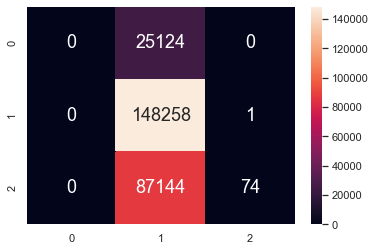

In [6]:
tr_dmgDF_pred = dectree.predict(tr_heightDF)

print("Classification Accuracy \t:", dectree.score(tr_heightDF, tr_dmgDF))

from sklearn.metrics import confusion_matrix

sb.heatmap(confusion_matrix(tr_dmgDF, tr_dmgDF_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

#### Although the overall classification accuracy isn't great, we can see that this tree successfully classified buildings with height percentage ≤ 31.5 to be in damage grade 3 almost 100% accurately

### Using Age as a predictor

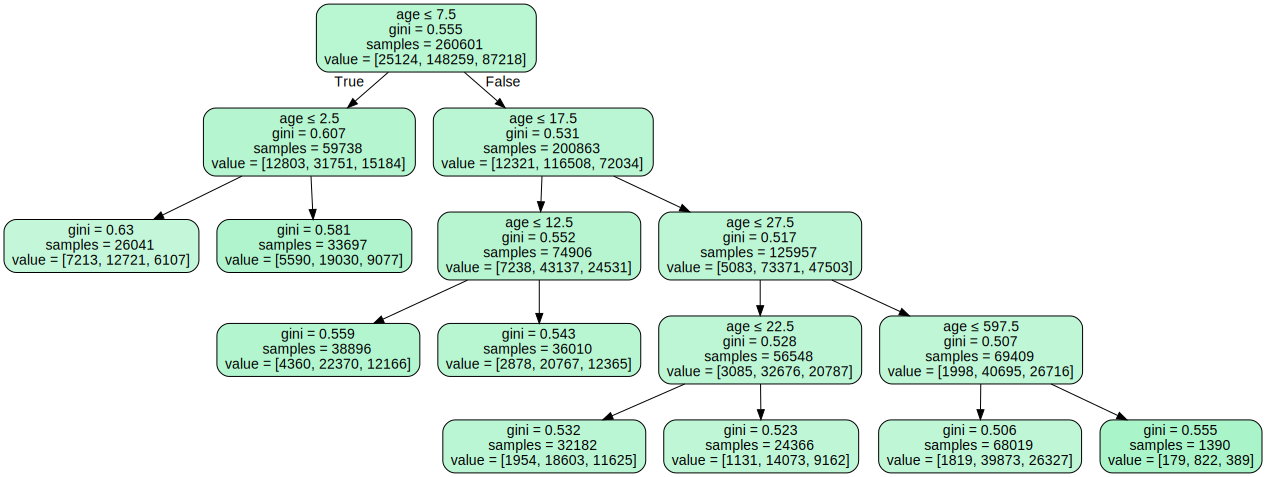

In [7]:
dectree = DecisionTreeClassifier(max_depth = 4)

dectree.fit(tr_ageDF, tr_dmgDF)

treedot = export_graphviz(dectree,
                         feature_names = tr_ageDF.columns,
                         out_file = None,
                         filled = True,
                         rounded = True,
                         special_characters = True)
graphviz.Source(treedot)

Classification Accuracy 	: 0.5689118614280068


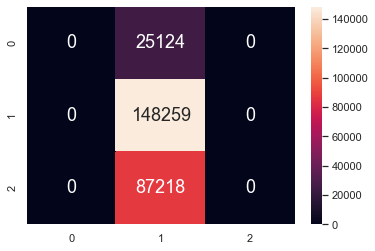

In [8]:
tr_dmgDF_pred = dectree.predict(tr_ageDF)

print("Classification Accuracy \t:", dectree.score(tr_ageDF, tr_dmgDF))

from sklearn.metrics import confusion_matrix

sb.heatmap(confusion_matrix(tr_dmgDF, tr_dmgDF_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

### Using area percentage as a predictor 

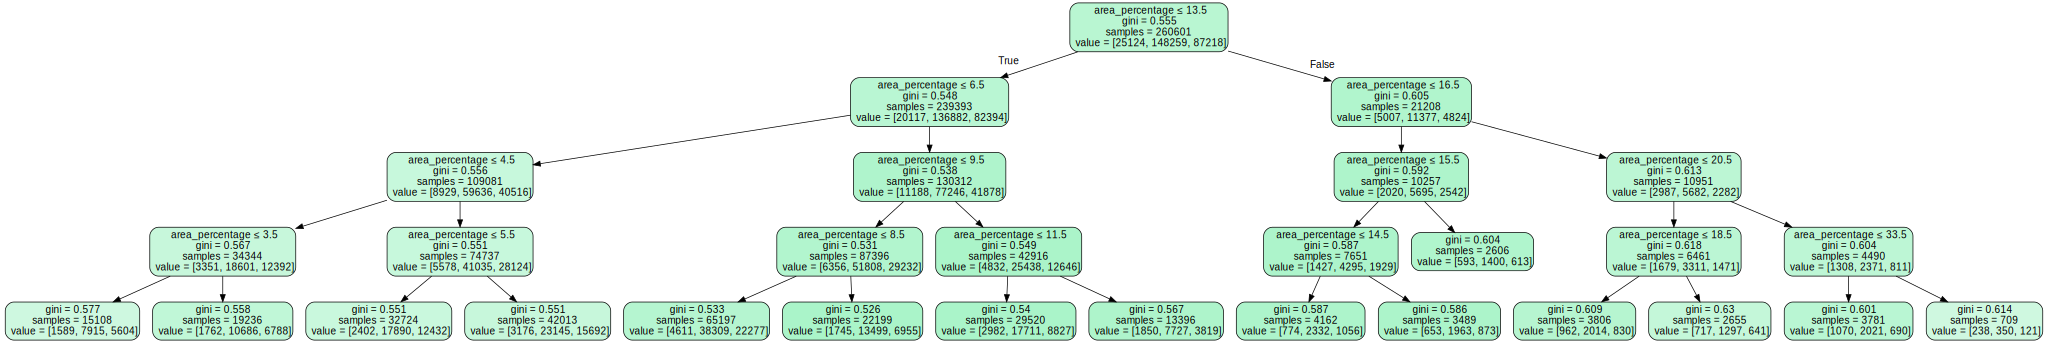

In [9]:
dectree = DecisionTreeClassifier(max_depth = 4)

dectree.fit(tr_areaDF, tr_dmgDF)

treedot = export_graphviz(dectree,
                         feature_names = tr_areaDF.columns,
                         out_file = None,
                         filled = True,
                         rounded = True,
                         special_characters = True)
graphviz.Source(treedot)

In [10]:
tr_dmgDF_pred = dectree.predict(tr_areaDF)

print("Classification Accuracy \t:", dectree.score(tr_areaDF, tr_dmgDF))


Classification Accuracy 	: 0.5689118614280068


#### The classification accuracy is not great for any of these trees with ~57% accuracy. We will try a multi-variate decision tree with higher max depth in attempt to improve the classification accuracy

### Multi-Variate Decision Tree -> not visualized due to high max depth, comment in if wanted

Classification Accuracy 	: 0.5949593439779587


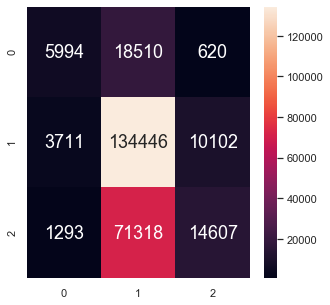

In [11]:
train = pd.read_csv('train_values.csv')
y_train = tr_dmgDF #train response
X_train = pd.DataFrame(train[['age','count_floors_pre_eq', 'height_percentage', 'area_percentage']])
dectree = DecisionTreeClassifier(max_depth = 20)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model





tr_dmgDF = pd.DataFrame(train['damage_grade'])
tr_ageDF = pd.DataFrame(train['age'])
tr_floorsDF = pd.DataFrame(['count_floors_pre_eq'])
tr_heightDF = pd.DataFrame(train['height_percentage'])
tr_areaDF = pd.DataFrame(train['area_percentage'])


# Plot the Decision Tree
from sklearn.tree import export_graphviz
treedot = export_graphviz(dectree,                                      # the model
                          feature_names = X_train.columns,              # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript

#import graphviz
#graphviz.Source(treedot)   -> comment in to visualize

y_train_pred = dectree.predict(X_train)
print("Classification Accuracy \t:", dectree.score(X_train, y_train))

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 1, figsize=(5,5))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [12]:
train

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,688636,25,1335,1621,1,55,6,3,n,r,...,0,0,0,0,0,0,0,0,0,2
260597,669485,17,715,2060,2,0,6,5,t,r,...,0,0,0,0,0,0,0,0,0,3
260598,602512,17,51,8163,3,55,6,7,t,r,...,0,0,0,0,0,0,0,0,0,3
260599,151409,26,39,1851,2,10,14,6,t,r,...,0,0,0,0,0,0,0,0,0,2


### The classification accuracy is poor for all of our trees. In an attempt remedy this, we will convert the dataset into new data frames with true or false binary values for individual damage grades, and run them through the classification tree models again. This should increase our classification accuracy [SEE MACHINE LEARNING PART 2 NOTEBOOK]

### Multivariate tree using all variables & encoded categoricals

Classification Accuracy 	: 0.8433582373053058


Text(0.5, 1, 'Training Dataset Confusion Matrix')

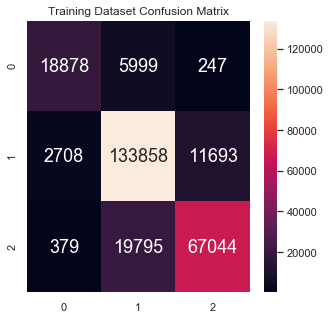

In [13]:
y_train = tr_dmgDF #train response
X = train #predictors
X=X.drop(["building_id", "damage_grade"],axis=1) #removing 'building_id', not relvent as a predictor

# encoding catagorical variables
encode_col=['land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'legal_ownership_status']

# label encoding categorical columns for the predictors in X (train)
for i in encode_col:
    X[i]=X[i].astype("category")
    X[i]=X[i].cat.codes
    

dectree = DecisionTreeClassifier(max_depth = 20)  # create the decision tree object
dectree.fit(X, y_train)                    # train the decision tree model

       
# Plot the Decision Tree
from sklearn.tree import export_graphviz
treedot = export_graphviz(dectree,                                      # the model
                          feature_names = X.columns,              # the features 
                          out_file = None,                              # output file
                          filled = True,                                # node colors
                          rounded = True,                               # make pretty
                          special_characters = True)                    # postscript

#import graphviz
#graphviz.Source(treedot)   -> comment in to visualize

y_train_pred = dectree.predict(X)
print("Classification Accuracy \t:", dectree.score(X, y_train))

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 1, figsize=(5,5))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}).set_title('Training Dataset Confusion Matrix')



Classification Accuracy 	: 0.8960727272727272


Text(0.5, 1, 'Test Dataset Confusion Matrix')

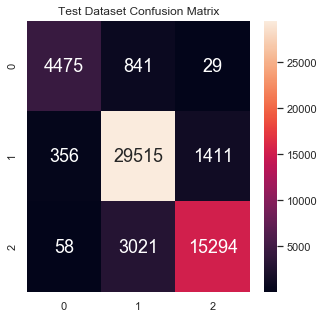

In [14]:
#test set
y_test = te_dmgDF #test response
Y = test
Y=Y.drop(["building_id", "damage_grade"],axis=1) #removing 'building_id', not relvent as a predictor

# encoding catagorical variables
encode_col=['land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'legal_ownership_status']

for i in encode_col:
    Y[i]=Y[i].astype("category")
    Y[i]=Y[i].cat.codes
    
    
dectree = DecisionTreeClassifier(max_depth = 20)  # create the decision tree object
dectree.fit(Y, y_test)                    # train the decision tree model

y_test_pred = dectree.predict(Y)
print("Classification Accuracy \t:", dectree.score(Y, y_test))

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 1, figsize=(5,5))
sb.heatmap(confusion_matrix(y_test, y_test_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}).set_title('Test Dataset Confusion Matrix')
